# BOSTON HOUSE PRICE PREDICTION- LINEAR REGRESSION

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [4]:
bos.columns = boston.feature_names
print(bos.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [5]:
bos['PRICE'] = boston.target


In [6]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
bos.shape

(506, 14)

# Exploratory Data Analysis

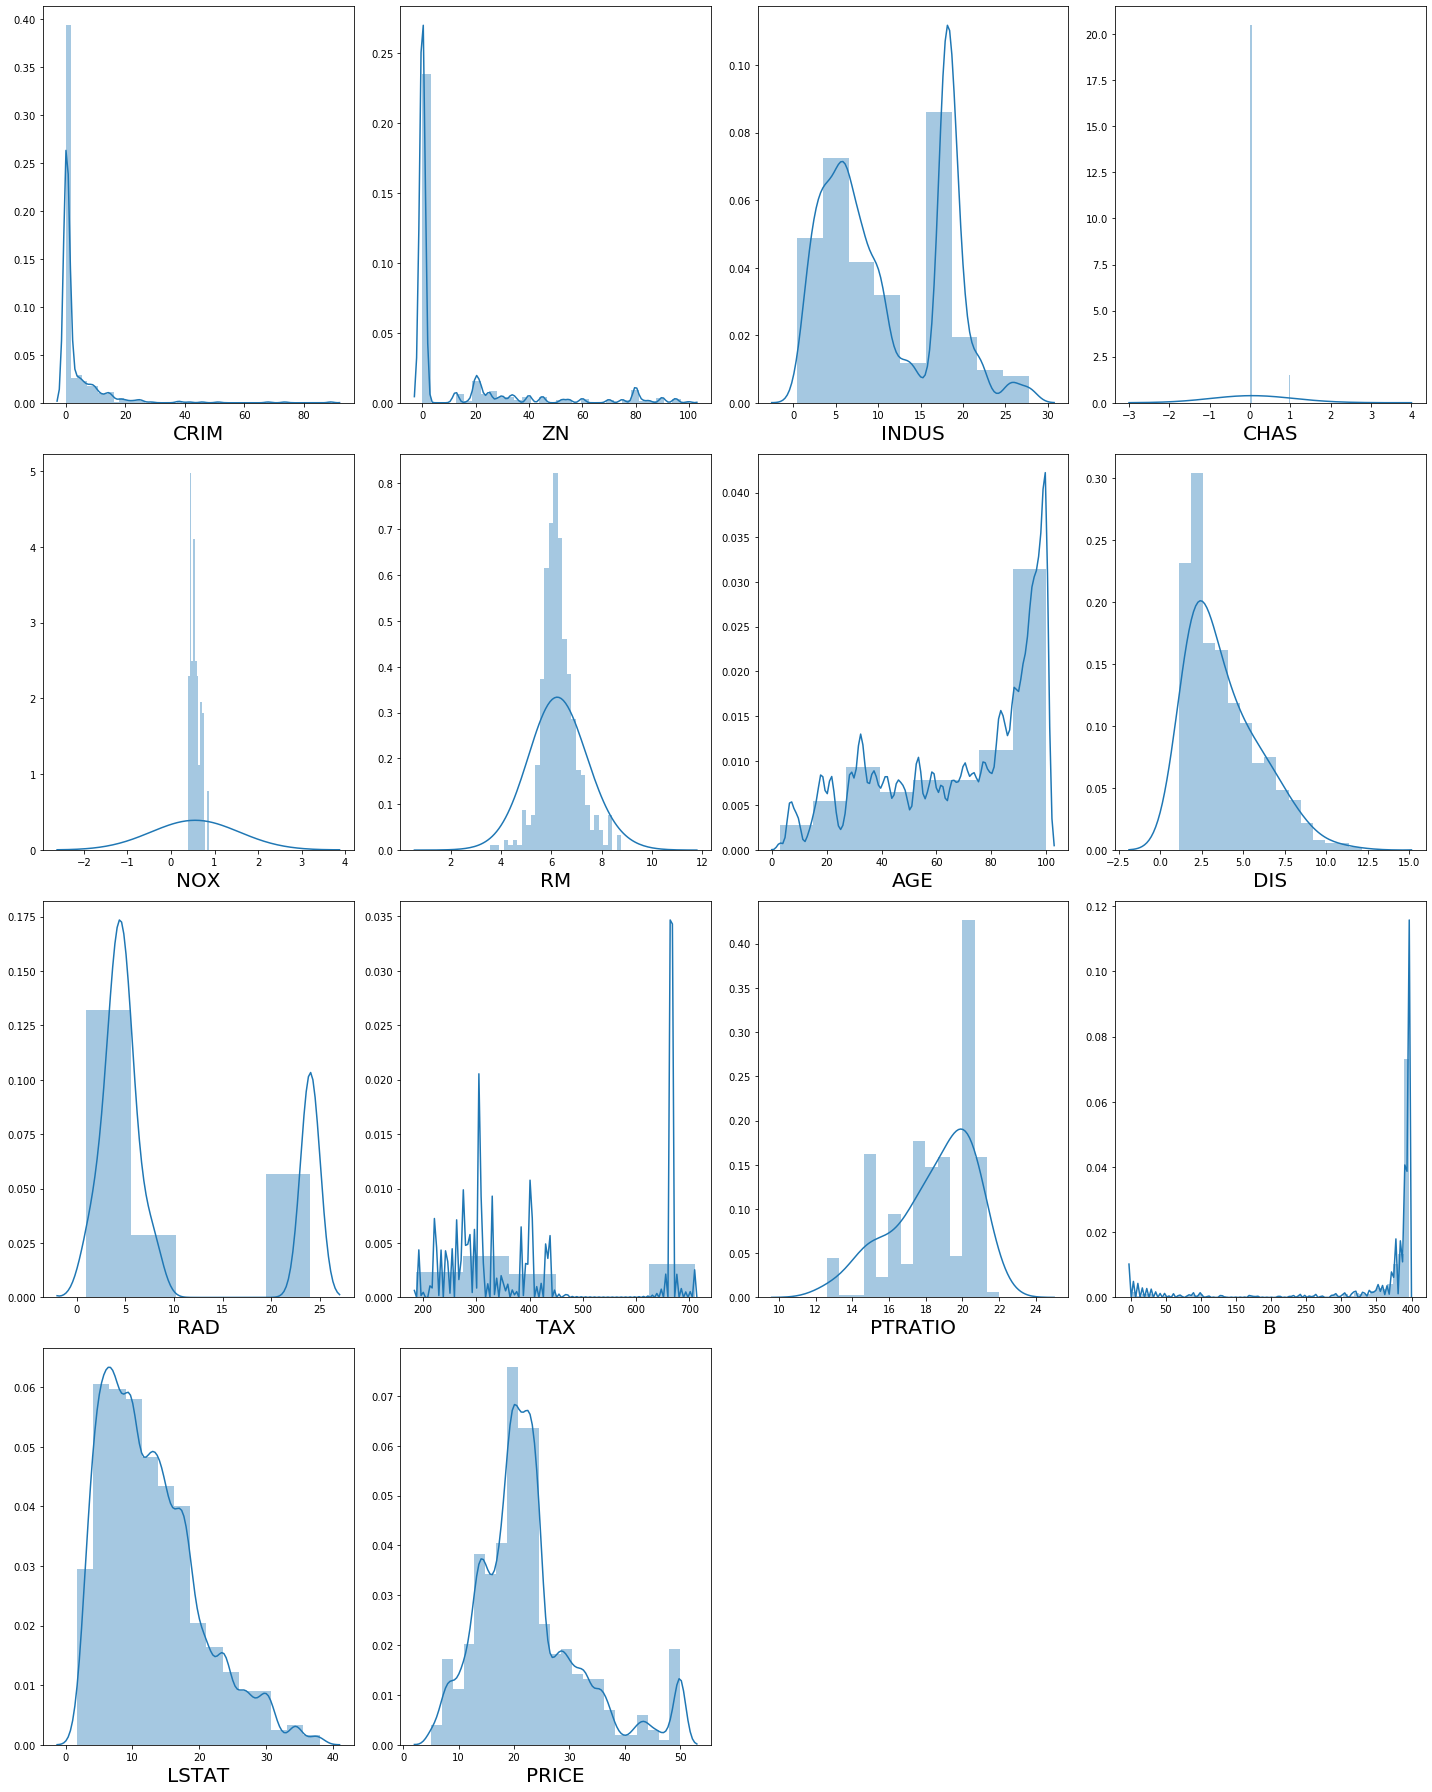

In [8]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column],kde_kws={'bw': 1})
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

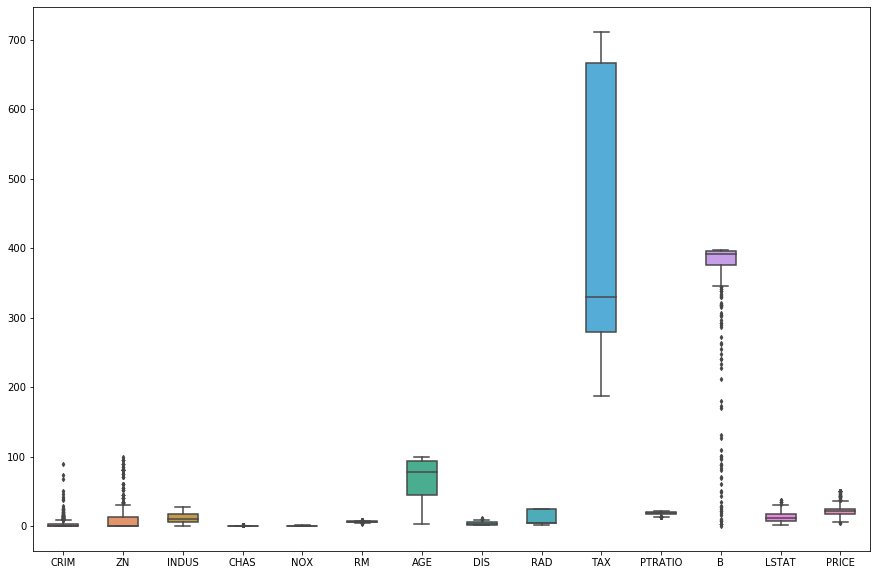

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos, width= 0.5,ax=ax,  fliersize=3)
plt.show()

In [11]:

q = bos['CRIM'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = bos[bos['CRIM']<q]
q = data_cleaned['ZN'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['ZN']<q]
q = data_cleaned['B'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['B']<q]


# After Cleaning

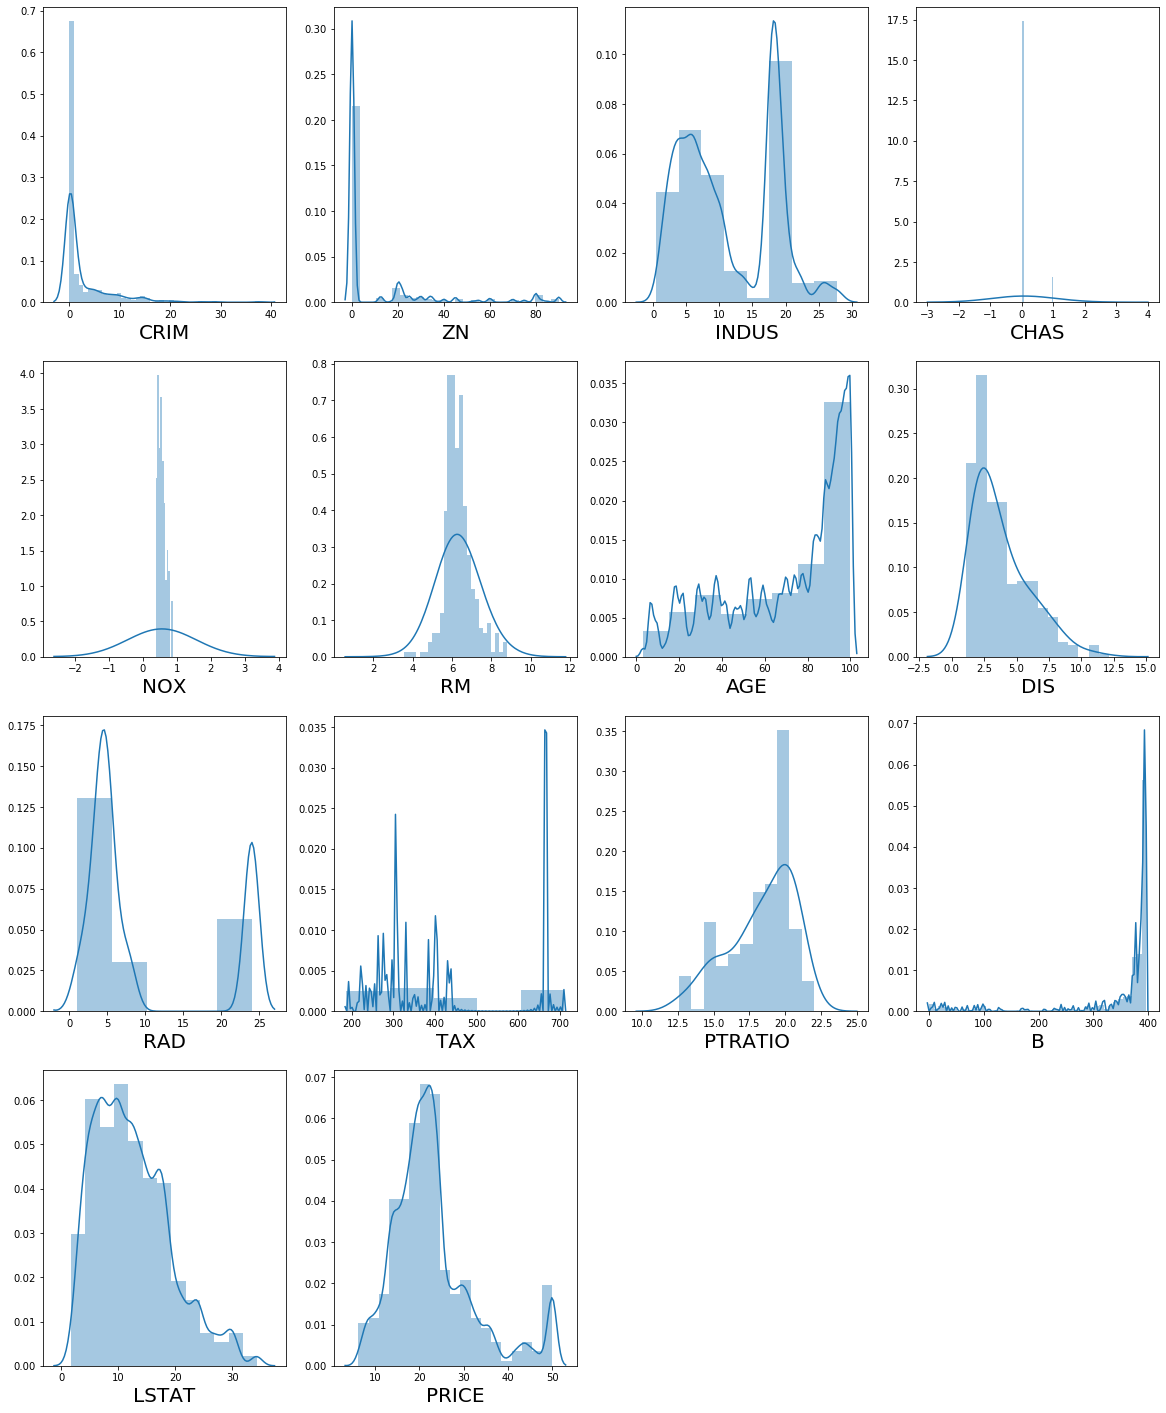

In [12]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data_cleaned[column],kde_kws={'bw': 1})
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [13]:
y = data_cleaned['PRICE']
X =data_cleaned.drop(columns = ['PRICE'])

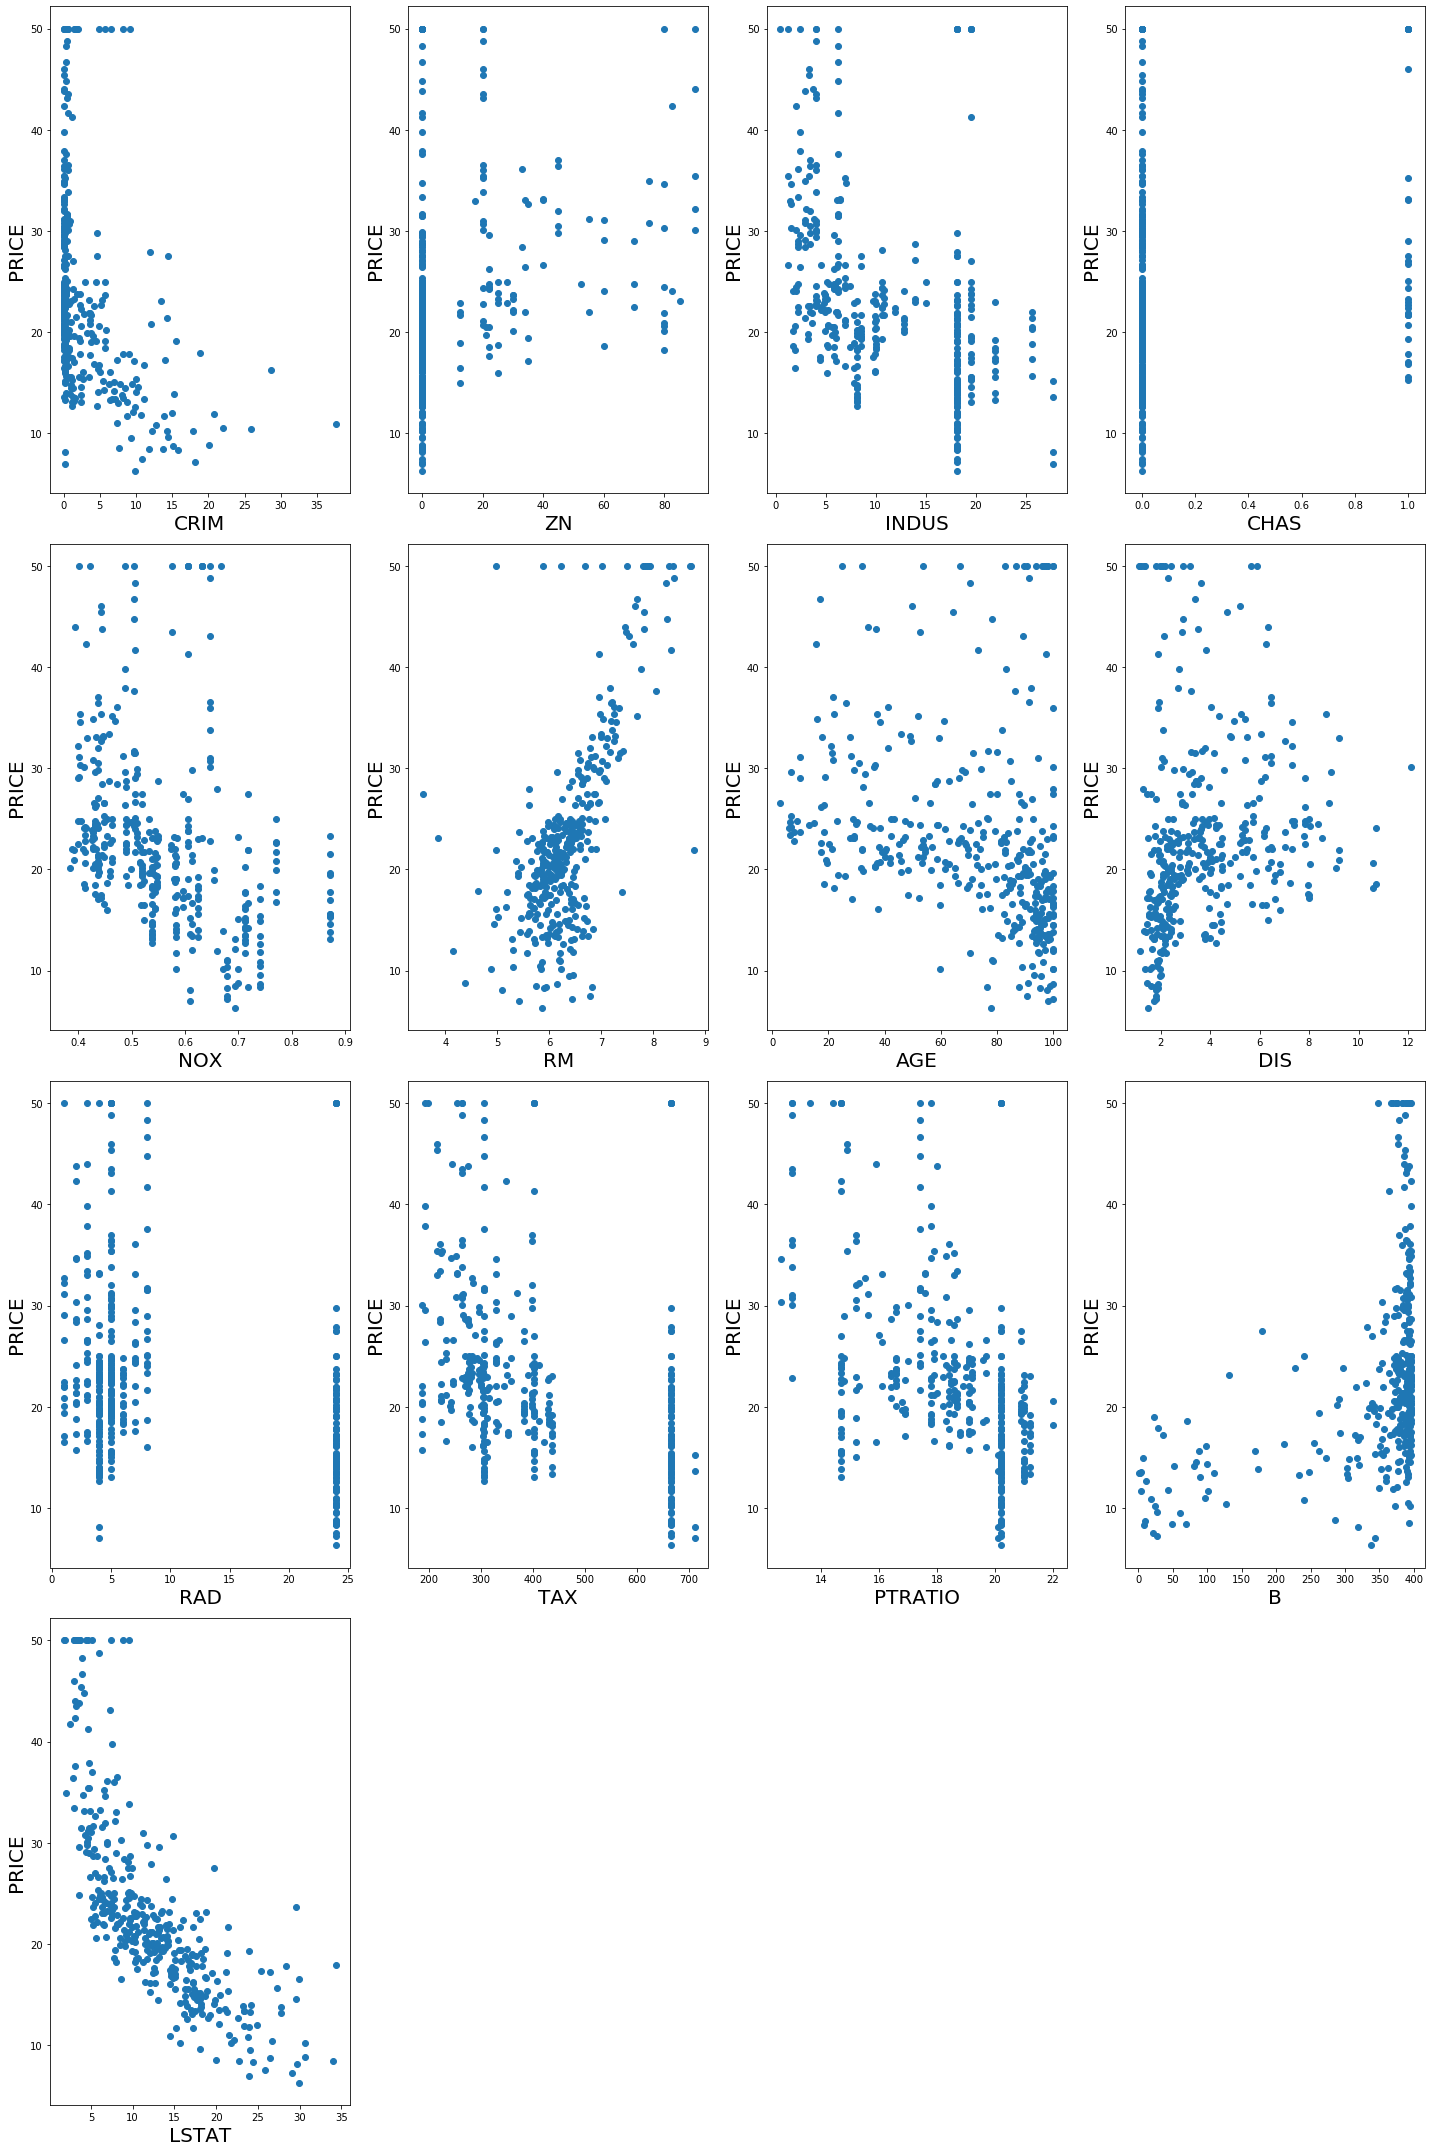

In [14]:
# observe the relationship between independent variables and dependent variable

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PRICE',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Scaling

In [15]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

#  VIF

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [ ]:
vif

,VIF,Features
0,3.225677,CRIM
1,2.540016,ZN
2,3.715435,INDUS
3,1.080834,CHAS
4,4.053309,NOX
5,1.784012,RM
6,2.924524,AGE
7,4.260886,DIS
8,8.438232,RAD
9,8.402889,TAX


In [17]:
X.drop(columns=['RAD','TAX'], inplace=True)

In [18]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

# Train test split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [20]:
y_train

434    11.7
472    23.2
355    20.6
354    18.2
3      33.4
       ... 
75     21.4
390    15.1
461    17.7
170    17.4
334    20.7
Name: PRICE, Length: 282, dtype: float64

In [21]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluation

In [22]:
regression.score(x_train,y_train)

0.7477248977346372

In [23]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [24]:
adj_r2(x_train,y_train)

0.7374470231979002